In [28]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from os import listdir
from os.path import isfile, join
from trajectory_vars import *


def read_world(fname):
    with open(join('worlds/', fname + '.csv')) as world_file:
        reader = csv.DictReader(world_file, delimiter=',')
        rows = []
        for row in reader:
            rows.append(row)
        return rows
    
    
def plot_worlds(data):

    # Obstacles
    fig, axs = plt.subplots(2, 3, figsize=(13, 9))
    c = 0.3
    
    idxs = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2)}
    
    for i, world in enumerate(data):
        obstacles = read_world(world[0])
        xs, ys = [], []

        for obstacle in obstacles:
            xs.append(float(obstacle[X]))
            ys.append(- float(obstacle[Y]))

        axs[idxs[i]].plot(ys, xs, 'o', color='#99b88a', markersize= c * float(obstacle[SIZE]))

        axs[idxs[i]].set_xlim(world[1][0])
        axs[idxs[i]].set_ylim(world[1][1])
        axs[idxs[i]].set_title(world[2])

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig('figs/worlds.pdf')


In [29]:
data = [
    [
        'corridor',
        [[-10, 40], [10, 50]],
        'Straight corridor'
    ], [
        'corridor-90',
        [(-10, 50), (10, 70)],
        '90 degree corridor'
    ], [
        'curve-corridor',
        [(-30, 40), (10, 85)],
        'Curved corridor'
    ], [
        'wall', 
        [(-20, 30), (0, 50)],
        'Wall of trees'
    ], [
        'random',
        [[-20, 20], [20, 60]],
        'Random cluster of trees'
    ], [
        'tree',
        [[-10, 10], [10, 30]],
        'Single tree'
    ]
]

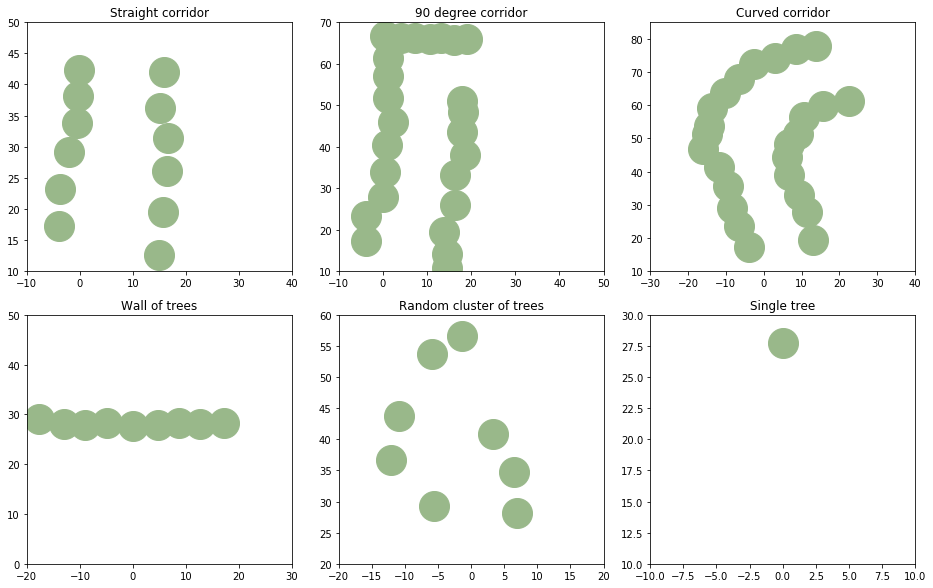

In [30]:
plot_worlds(data)